# Matplotlib使用分享

## 01-Introduction

### 1.1基础曲线

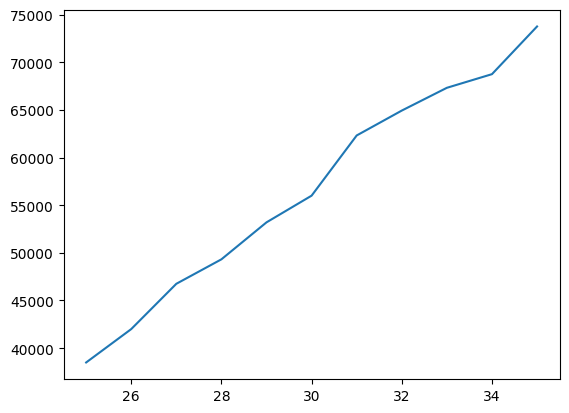

In [28]:
# 导入matplotlib包
import matplotlib.pyplot as plt

# 传入x轴、y轴数据
# 程序员在各年龄段的平均工资
ages_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
dev_y = [38496, 42000, 46752, 49320, 53200,
         56000, 62316, 64928, 67317, 68748, 73752]

# 使用plot函数画图
plt.plot(ages_x, dev_y)
# 显示图像
plt.show()

### 1.2显示多条曲线

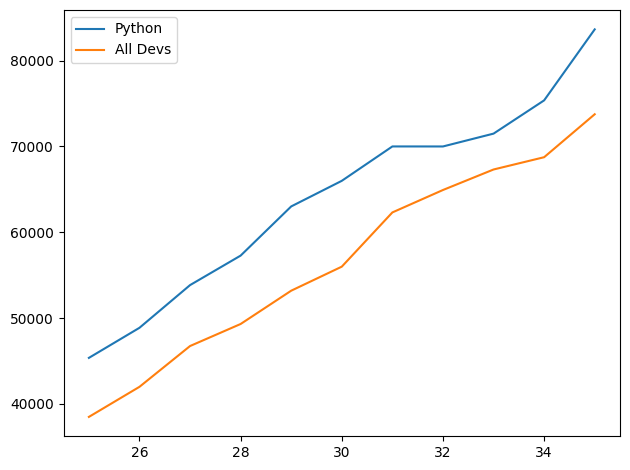

In [29]:
# Python程序员各年龄段平均工资
py_dev_y = [45372, 48876, 53850, 57287, 63016,
            65998, 70003, 70000, 71496, 75370, 83640]
plt.plot(ages_x, py_dev_y, label='Python')

# label定义标签，与legend联用自动变成图例。
plt.plot(ages_x, dev_y, label='All Devs')

plt.legend()  # 添加图例

plt.tight_layout()  # 整理图表画面

plt.show()

### 1.3图表美化

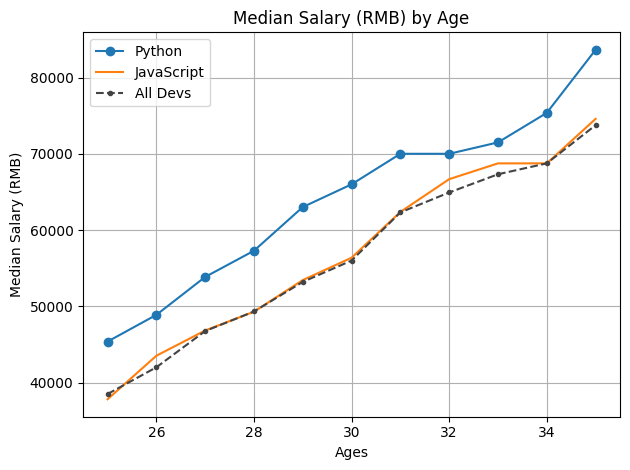

In [30]:
plt.plot(ages_x, py_dev_y, marker='o', label='Python')
# JavaScript程序员各年龄段平均工资
js_dev_y = [37810, 43515, 46823, 49293, 53437,
            56373, 62375, 66674, 68745, 68746, 74583]
plt.plot(ages_x, js_dev_y, label='JavaScript')

# color定义曲线颜色；linestyle定义曲线样式；marker定义曲线节点；label定义标签，与legend联用自动变成图例。
plt.plot(ages_x, dev_y, color='#444444',
         linestyle='--', marker='.', label='All Devs')

plt.xlabel('Ages')  # x轴标题
plt.ylabel('Median Salary (RMB)')  # y轴标题
plt.title('Median Salary (RMB) by Age')  # 曲线图标题

plt.legend()  # 添加图例
plt.grid()  # 添加网格
plt.tight_layout()  # 整理图表画面

plt.show()

## 02-BarCharts

### 2.1基础柱状图

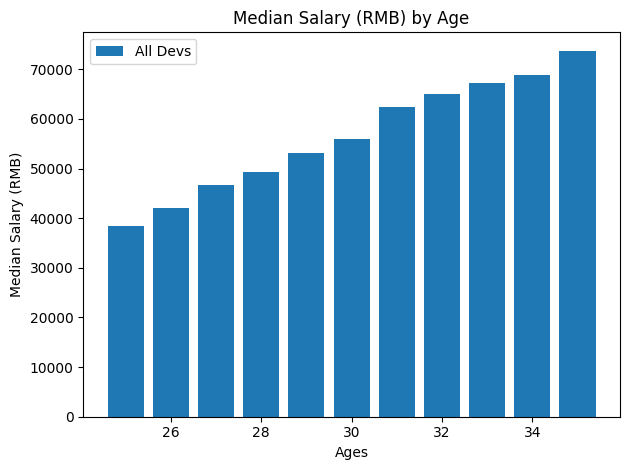

In [31]:
plt.bar(ages_x, dev_y, label='All Devs')

plt.xlabel('Ages')  # x轴标题
plt.ylabel('Median Salary (RMB)')  # y轴标题
plt.title('Median Salary (RMB) by Age')  # 曲线图标题

plt.legend()  # 添加图例
plt.tight_layout()  # 整理图表画面

plt.show()

### 2.2利用柱状图进行数据对比

#### 2.2.1错误示范

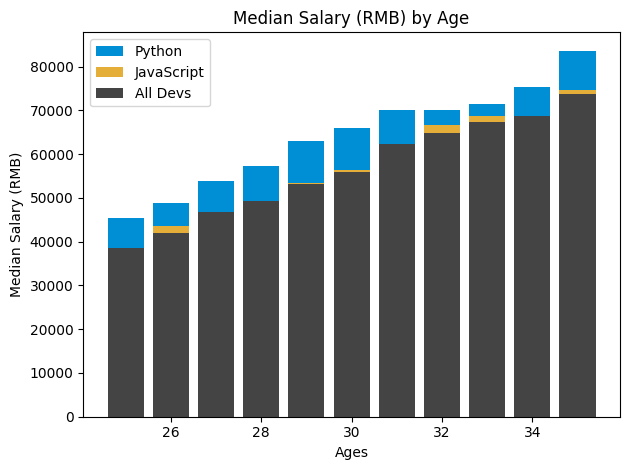

In [32]:
plt.bar(ages_x, py_dev_y, color="#008fd5", label='Python')
plt.bar(ages_x, js_dev_y, color="#e5ae38", label='JavaScript')
plt.bar(ages_x, dev_y, color="#444444", label="All Devs")

plt.xlabel('Ages')  # x轴标题
plt.ylabel('Median Salary (RMB)')  # y轴标题
plt.title('Median Salary (RMB) by Age')  # 标题

plt.legend()
plt.tight_layout()

plt.show()

#### 2.2.2正确写法

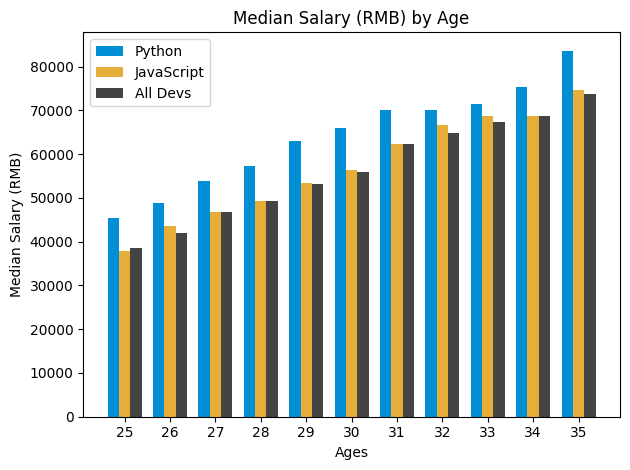

In [33]:
import numpy as np

x_indexes = np.arange(len(ages_x))  # 对x轴坐标进行处理
width = 0.25  # matplotlib柱子默认宽度为0.8，多条柱子要注意宽度设置

plt.bar(x_indexes - width, py_dev_y, width=width,
        color="#008fd5", label='Python')
plt.bar(x_indexes, js_dev_y, width=width, color="#e5ae38", label='JavaScript')
plt.bar(x_indexes + width, dev_y, width=width,
        color="#444444", label="All Devs")

plt.xlabel('Ages')  # x轴标题
plt.ylabel('Median Salary (RMB)')  # y轴标题
plt.title('Median Salary (RMB) by Age')  # 标题
plt.xticks(x_indexes, ages_x)  # 设置x轴标签

plt.legend()
plt.tight_layout()

plt.show()

### 2.3读取CSV文件数据

#### 2.3.1传统方式

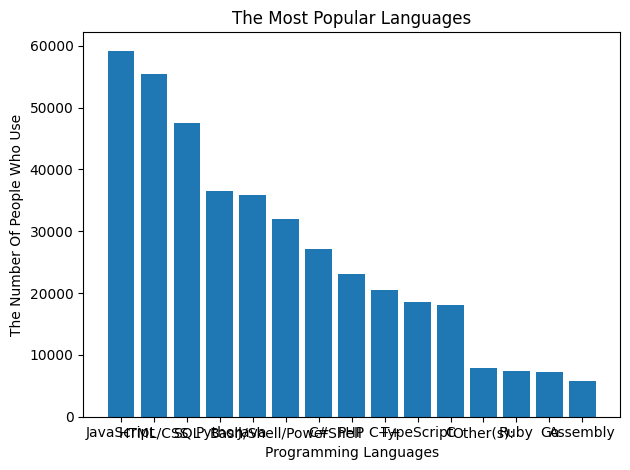

In [34]:
import csv
from collections import Counter

with open('data.csv') as csv_file:
    csv_reader = csv.DictReader(csv_file)

    language_counter = Counter()

    for row in csv_reader:
        language_counter.update(row['LanguagesWorkedWith'].split(';'))
    
languages = []
popularity = []

for item in language_counter.most_common(15):
    languages.append(item[0])
    popularity.append(item[1])

plt.bar(languages, popularity)

plt.xlabel('Programming Languages')  # x轴标题
plt.ylabel('The Number Of People Who Use')  # y轴标题
plt.title('The Most Popular Languages')  # 标题

plt.tight_layout()

plt.show()

#### 2.3.2行列转置

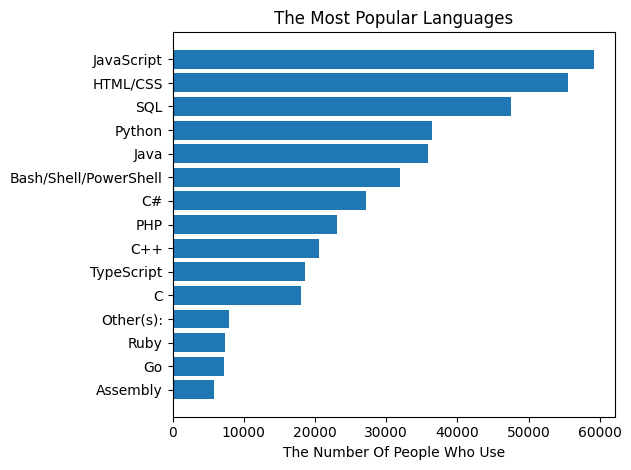

In [35]:
languages.reverse()  # 倒序
popularity.reverse()  # 倒序

plt.barh(languages, popularity)

plt.xlabel('The Number Of People Who Use')  # x轴标题
plt.title('The Most Popular Languages')  # 标题

plt.tight_layout()

plt.show()

#### 2.3.3使用pandas

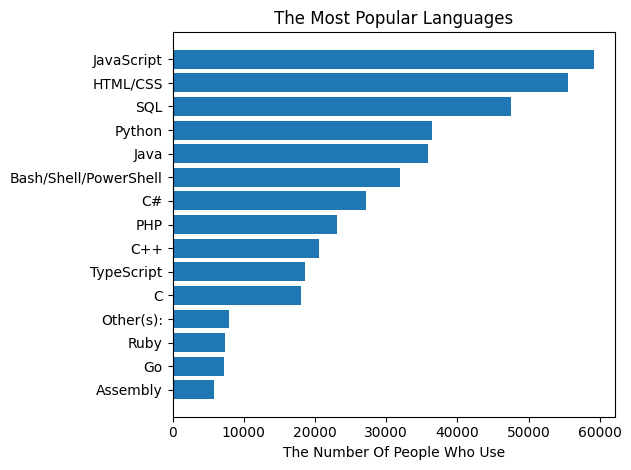

In [36]:
import pandas as pd

data = pd.read_csv('data.csv')
ids = data['Responder_id']
lang_responses = data['LanguagesWorkedWith']

language_counter = Counter()

for response in lang_responses:
    language_counter.update(response.split(';'))
    
languages = []
popularity = []

for item in language_counter.most_common(15):
    languages.append(item[0])
    popularity.append(item[1])

languages.reverse()  # 倒序
popularity.reverse()  # 倒序

plt.barh(languages, popularity)

plt.xlabel('The Number Of People Who Use')  # x轴标题
plt.title('The Most Popular Languages')  # 标题

plt.tight_layout()

plt.show()